<a href="https://colab.research.google.com/github/MSiswanto/MachineLearning/blob/main/Background_Removal_with_Mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Source : https://www.analyticsvidhya.com/blog/2022/03/background-removal-in-the-image-using-the-mediapipe-library/

In [8]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.21 which is incompatible.


In [9]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [10]:
change_background_mp = mp.solutions.selfie_segmentation
change_bg_segment = change_background_mp.SelfieSegmentation()

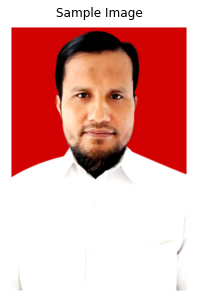

In [11]:
sample_img = cv2.imread('./Meilana_Siswanto.jpg')
plt.figure(figsize = [5, 5])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

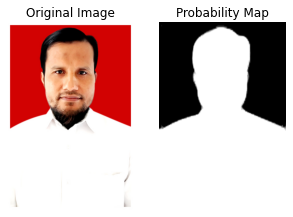

In [12]:
RGB_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
result = change_bg_segment.process(RGB_sample_img)
plt.figure(figsize=[5,5])
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(result.segmentation_mask, cmap='gray');plt.title("Probability Map");plt.axis('off');

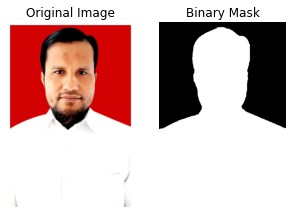

In [13]:
nilai_threshold = 0.6
binary_mask = result.segmentation_mask > nilai_threshold

plt.figure(figsize=[5,5])
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(binary_mask, cmap='gray');plt.title("Binary Mask");plt.axis('off');

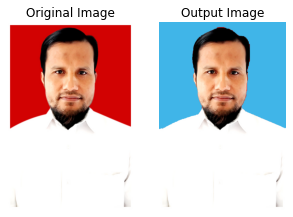

In [14]:
binary_mask_3 = np.dstack((binary_mask,binary_mask,binary_mask))

output_image = np.where(binary_mask_3, sample_img, (232,181,64))    

plt.figure(figsize=[5,5])

plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');